**Author**: `Quratul AIN`\
**contact** : `qurat-zee@hotmail.com`

# Problem Statement
Record a video or download a timelapse video of evening where the transition of day to evening or evening to night is visible clearly. 

Video condition : any of below
1. Day to evening
2. Evening to Night
3. Night to Morning/Day

- Input : video file path
- Output : 40% is Day/Evening, 60% is Night/Evening
- Output : 20 Early morning, 10% night, 70% Day

# Solution
The above problem can be solve by calculating the brightness with in the frames of video and can solve by using following approaches

1. Calculating the RGB Ratio
This method involves analyzing the individual Red, Green, and Blue channels of each frame in the video to determine brightness and color characteristics.
How It Works:
- Calculate the average pixel values of the R, G, and B channels.
- By examining the ratios of these values, categorize frames based on their color dominance (e.g., a high red ratio might indicate a sunset).
  This helps in distinguishing different lighting conditions while retaining color information.

2. Using the Value Channel in HSV
In the HSV (Hue, Saturation, Value) color space, the Value channel represents brightness.
How It Works:
- Convert each frame from BGR to HSV.
- Use the Value (V) channel to assess brightness levels.
- This method can be more effective in capturing variations in lighting conditions due to the separation of color and brightness information.
  It allows for better categorization of frames into Day, Evening, and Night.
  
3. Using the Grayscale Approach
The grayscale approach simplifies the frame to a single channel that represents intensity without color information.
How It Works:
- Convert each frame to grayscale using OpenCV.
- Calculate the mean pixel intensity of the grayscale image.
- Use this average intensity to categorize the frame as Day, Evening, or Night.
- This method is straightforward and computationally efficient, focusing solely on brightness.


Hence 
- RGB Ratio retains color information and can reveal specific conditions but may be sensitive to lighting changes.
- HSV provides a robust way to capture brightness while separating color information, making it effective for varying conditions.
- Grayscale is simple and fast, ideal for applications focused purely on brightness without concern for color.


# WorkFlow

**Data Collection**
-  A video that show dawn or dusk
  
**Analysis Using HSV** 
   1.  Convert the video into frames, and then convert each frame into a HSV image(remember opencv use BGR not RGB).So we use BGR2HSV converter
   2.  In HSV the brightness channel is V so we calculate the mean of overall brightness of each frames.
   3.  Next set a threshold to filter out the frames that are not in the range of dawn and dusk by applying condition.
   4.  Next we create a counter to count the number of frames w.r.t day evening and night
   5.  Finally process our video frames and categorize it each frame according to the brightness in order to specify the day,evening or night.
   6.  At last calculate the percentage of all the frames. 
   7.  Finally we plot the count and percentage of frames w.r.t day evening and night to visualize the resultes.

In [9]:
!pip install opencv-python
import cv2
import numpy as np
import os


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
# Function to categorize brightness
def categorize_brightness(frame):
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    brightness = np.mean(hsv[:, :, 2])  
    if brightness > 200:  
        return "Day"
    elif brightness > 100:  
        return "Evening"
    else:  
        return "Night"

# Data Ingestion
video_path = "video.mp4"  
cap = cv2.VideoCapture(video_path)

# Create a folder named 'images' if it doesn't exist, its also optional not necessary just for R&D
output_folder = "images"
os.makedirs(output_folder, exist_ok=True)  

# Initialize counters for counting
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Categorize the current frame
    category = categorize_brightness(frame)
    
    # Save the frame as an image based on its category, this step is optional not necessary, just for R&D
    if category == "Day":
        day_count += 1
        cv2.imwrite(os.path.join(output_folder, f"day_frame_{day_count}.jpg"), frame)  # Save Day frames
    elif category == "Evening":
        evening_count += 1
        cv2.imwrite(os.path.join(output_folder, f"evening_frame_{evening_count}.jpg"), frame)  # Save Evening frames
    else:
        night_count += 1
        cv2.imwrite(os.path.join(output_folder, f"night_frame_{night_count}.jpg"), frame)  # Save Night frames
    
    total_frames += 1

# Release the video capture object
cap.release()

# Print the results
print(f"Total frames: {total_frames}")
print(f"Day frames saved: {day_count}")
print(f"Evening frames saved: {evening_count}")
print(f"Night frames saved: {night_count}")


# Calculate percentages 
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    print(f"Day Percentage: {day_percentage:.2f}%")
    print(f"Evening Percentage: {evening_percentage:.2f}%")
    print(f"Night Percentage: {night_percentage:.2f}%")
else:
    print("No frames processed.")

Total frames: 610
Day frames saved: 0
Evening frames saved: 530
Night frames saved: 80
Day Percentage: 0.00%
Evening Percentage: 86.89%
Night Percentage: 13.11%


> Threshold Conditions:
 Different lighting conditions can significantly affect the brightness of scenes and detect the specific event
- `Daylight`: Bright, often exceeding 200 in the V channel, indicating well-lightening scenes but here we have cloudy weather thats why it detect no bright light.
- `Evening`: Transitional lighting, where the brightness may vary significantly but often falls in the range of 100 to 200 as the sun sets.
- `Night`: Very low brightness, typically below 100, indicating darkness.

# Visualizing the result

In [11]:
import matplotlib.pyplot as plt

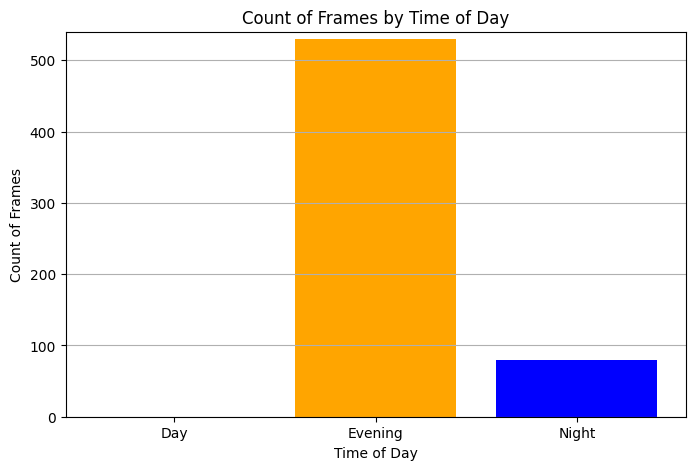

In [12]:
labels = ['Day', 'Evening', 'Night']
counts = [day_count, evening_count, night_count]
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color=['yellow', 'orange', 'blue'])
plt.title('Count of Frames by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Frames')
plt.ylim(0, max(counts) + 10) 
plt.grid(axis='y')
plt.show()

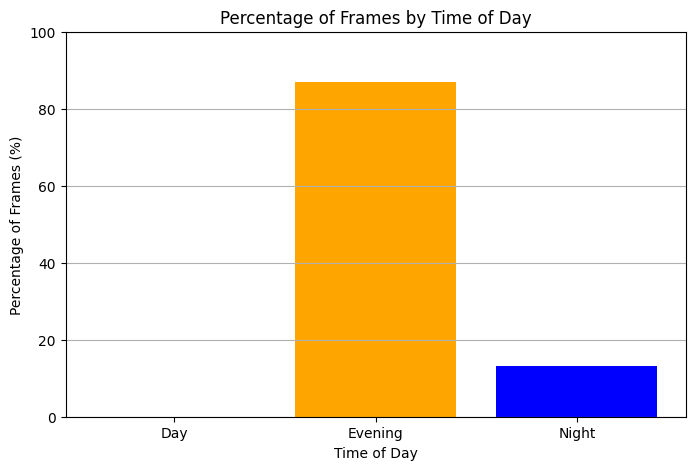

In [ ]:
# Prepare data for plotting percentage
labels = ['Day', 'Evening', 'Night']
percentages = [day_percentage, evening_percentage, night_percentage]

# Create a bar plot for percentages
plt.figure(figsize=(8, 5))
plt.bar(labels, percentages, color=['yellow', 'orange', 'blue'])
plt.title('Percentage of Frames by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Percentage of Frames (%)')
plt.ylim(0, 100)  # Set y-axis limit from 0 to 100%
plt.grid(axis='y')

# Show the plot
plt.show()

# Using Gray-Scale

In [ ]:
# Function to categorize brightness
def categorize_brightness(frame):
    # Convert the frame to grayscale
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the average brightness
    brightness = np.mean(gray_frame)  # Mean of pixel values in grayscale
    
    # Define thresholds for categorization
    if brightness > 200:  # High brightness
        return "Day"
    elif brightness > 100:  # Medium brightness
        return "Evening"
    else:  # Low brightness
        return "Night"

# Input video file path
video_path = "video.mp4" 
cap = cv2.VideoCapture(video_path)

# Initialize counters
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break  

    # Categorize the current frame
    category = categorize_brightness(frame)
    
    # Increment the appropriate counter
    if category == "Day":
        day_count += 1
    elif category == "Evening":
        evening_count += 1
    else:
        night_count += 1
    
    total_frames += 1

# Release the video capture object
cap.release()

# Calculate percentages
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    # Print the results
    print(f"Day: {day_percentage:.2f}%")
    print(f"Evening: {evening_percentage:.2f}%")
    print(f"Night: {night_percentage:.2f}%")
else:
    print("No frames processed.")

Day: 0.00%
Evening: 83.93%
Night: 16.07%


**Grayscale Pixel Values**
- In a grayscale image, pixel values range from 0 to 255:
 0 represents black (no brightness).
 255 represents white (maximum brightness).
 Values in between represent varying shades of gray.


*Categorization Logic*
The chosen thresholds are meant to differentiate between bright, medium, and dark conditions:
- Brightness > 200: This is considered a very bright condition (likely daylight).
- Brightness > 100 and ≤ 200: This represents a medium brightness, which could be interpreted as evening or twilight conditions.
- Brightness ≤ 100: This indicates low brightness, typically associated with nighttime.

# Using RGB ratio

In [ ]:
# Function to categorize brightness based on RGB channels
def categorize_brightness_rgb(frame):
    # Split the frame into R, G, and B channels
    b, g, r = cv2.split(frame)
    
    # Calculate average brightness as the mean of R, G, B channels
    brightness = (np.mean(r) + np.mean(g) + np.mean(b)) / 3
    
    # Define thresholds for categorization
    if brightness > 200: 
        return "Day"
    elif brightness > 100: 
        return "Evening"
    else:  
        return "Night"

# Function to analyze color ratios (for example, high red content)
def analyze_color_ratios(frame):
    b, g, r = cv2.split(frame)
    total = np.sum(r) + np.sum(g) + np.sum(b)
    
    if total == 0:
        return 0, 0, 0  # Avoid division by zero
    
    red_ratio = np.sum(r) / total
    green_ratio = np.sum(g) / total
    blue_ratio = np.sum(b) / total

    return red_ratio, green_ratio, blue_ratio

# Input video file path
video_path = "video.mp4"  
cap = cv2.VideoCapture(video_path)

# Initialize counters
day_count = 0
evening_count = 0
night_count = 0
total_frames = 0

# Process the video frames
while True:
    ret, frame = cap.read()
    if not ret:
        break 
    
    # Categorize the current frame based on brightness
    category = categorize_brightness_rgb(frame)
    
    # Increment the appropriate counter
    if category == "Day":
        day_count += 1
    elif category == "Evening":
        evening_count += 1
    else:
        night_count += 1
    
    # Analyze color ratios
    red_ratio, green_ratio, blue_ratio = analyze_color_ratios(frame)

    total_frames += 1

# Release the video capture object
cap.release()

# Calculate percentages
if total_frames > 0:
    day_percentage = (day_count / total_frames) * 100
    evening_percentage = (evening_count / total_frames) * 100
    night_percentage = (night_count / total_frames) * 100

    # Print the results
    print(f"Day: {day_percentage:.2f}%")
    print(f"Evening: {evening_percentage:.2f}%")
    print(f"Night: {night_percentage:.2f}%")
else:
    print("No frames processed.")

Day: 0.00%
Evening: 83.77%
Night: 16.23%


**Threshold Ranges**
- High Brightness (Day):
A threshold above 200 signifies that the frame is bright enough to be categorized as "Day."
- Medium Brightness (Evening):
A threshold range of 100 to 200 captures frames that are transitioning from daylight to darkness, categorizing them as "Evening."
- Low Brightness (Night):
Values below 100 indicate a lack of light, categorizing frames as "Night."